# Project

# Random Walks

A random walk is a stochastic or random process that describes a path of successive random steps on some mathematical space.

In this project we will implement simple random walks on a regular grid of integers, where steps will be +1 or -1 along a single coordinate direction.

In [1]:
import math, copy, numpy as np
def random_step(current_position, distribution = None, allow_zero_step = False):
    """
    This function takes the current position as a list and 
    a distribution from which the next step of the random 
    walk will be drawn.  The randomly chosen step will be 
    applied to the current position and the new position of 
    the random walk will be returned.
    """    
    dim = len(current_position) #dimension
    next_pos = copy.deepcopy(current_position)     
    flag=0
    while flag==0:
        i=np.random.randint(0,dim)#choose any dimension at random
        next_pos[i] = current_position[i] + dist(distribution) #update the position
        if allow_zero_step is False:
            if next_pos[i]!=current_position[i]:
                flag = 1 #now we can break the loop since we got a change
                continue
        else:
            break
    return next_pos

## Test Code (1)

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as patches
import matplotlib.animation
from IPython.display import HTML
import numpy as np

def draw_next_step(step_idx):
    """
    Draws the next position in the random walk, by adding to the figure a
    line segment from the last position to the one returned by 
    random_step().  
    
    For dimensions > 2, only the first two values from the positions are
    used.
    """
    positions.append(random_step(positions[step_idx], distribution))
    if dimension > 1:
        l = mlines.Line2D([positions[step_idx]  [0],
                           positions[step_idx+1][0]], 
                          [positions[step_idx]  [1],
                           positions[step_idx+1][1]])
        current_pos = patches.Circle((positions[step_idx+1][0],
                                      positions[step_idx+1][1]),
                                     radius=0.5)
    else:
        l = mlines.Line2D([positions[step_idx]  [0],
                           positions[step_idx+1][0]],
                          [0,0])
        current_pos = patches.Circle((positions[step_idx+1][0], 0),
                                     radius=0.5)

    [p.remove() for p in reversed(axes.patches)] # clear previous draws
    l.set_color(plt.cm.plasma(step_idx/max_num_steps))
    axes.add_line(l)
    current_pos.set_color((1,0,0))
    axes.add_patch(current_pos)


def init():
    pass
    

    
# The maximum number of steps to be taken in the random walk
max_num_steps = 100
# The dimension of the space in which the random walk will occur
dimension = 2
# The history of positions in the random walk, initialized with the origin.
positions = [[0]*dimension]


# The distribution function to be used by the random walk
###################### This function is constructed taking into account possibility of zero step #########################
def dist(distribution = None):
    if distribution is None:
        return round(np.random.uniform(-1.4999999,1.5)) #uniform distribution with equal probability of getting -1 or 1
    elif distribution == np.random.randint:
        return np.random.randint(-1,2) #Choose an integer among -1,0,1 with equal probability
    elif distribution == np.random.binomial:
        return round(np.random.binomial(2,0.5)) - 1 #Binomial distribution with probability 0.5
    elif distribution == np.random.normal:
        import math
        val = round(np.random.normal()) #Standard Normal 
        return min(2, max(val,-1))
    elif distribution == np.random.poisson: 
        return np.random.poisson() - 1 #Poisson distribution
    else:
        print(distribution,'Choose other distribution')
        return
        



distribution = None


# Create figure and axes on which to draw
fig_size = 20 # Controls the size of the plot
fig, axes = plt.subplots(1)
axes.grid(True)
plt.xlim(-fig_size, fig_size)
plt.ylim(-fig_size, fig_size)
plt.close() # prevents the additional plot display of the final frame


if len(positions) >= 1:
    # Create the animation
    ani = matplotlib.animation.FuncAnimation(fig, draw_next_step, frames=max_num_steps, init_func=init)
    # Generate HTML representation of the animation
    display(HTML(ani.to_jshtml()))
else:
    print('Empty solution found')

    

## Solution 

Complete the `random_walk` function below.

In [3]:
def random_walk(max_steps=100, dimension=2, distribution = None):
    """
    Performs a random walk from the origin, consisting of max_steps steps.
    The history of positions in the random walk are returned as a list of 
    lists, e.g. [ [0,0], [-1,0], ..., [5,7], [5,6] ].
    """
    start = [[0]*dimension] #The starting point = Origin
    for i in range(max_steps):
        start.append(random_step(start[i], distribution))
    return start

## Test Code (2)

After completing the `random_walk` function above, modify the call to `random_walk()` in the test code below to accomodate any parameters you require.  The test block below will verify that each step in the random walk history took no more than one step in any direction, and only along coordinate directions.  Note that the test block below optionally allows for a step in the random walk to be zero, i.e. stand still for a time.  If your distribution does not allow "stay" then set `allow_zero_step` to `False`.

In [4]:
# This flag modifies the testing below to allow for (True) or 
# disallow (False) a step that allows remains in the same position,
# i.e. stands still for a time step
allow_zero_step = False
max_steps = 100

history = random_walk(max_steps) # add any parameters that you require

if history is None or len(history) != 1+max_steps: # +1 includes the initial position
    print(f'History does not contain {max_steps} steps')
else:
    for i in range(len(history)-1):
        pos_i = history[i]
        pos_j = history[i+1]
        num_moves = sum([abs(x-y) for x,y in zip(pos_i, pos_j)])
        if not allow_zero_step and num_moves is 0:
            print(f'Step {i}->{i+1} stayed in the same location')
            break
        if num_moves > 1:
            print(f'Step {i}->{i+1} is either longer than one or in more than one coordinate direction')
            break
    else:
        print('All steps appear to be valid')
        

All steps appear to be valid


## Your Solution (3)

Perform a Monte Carlo simulation that executes random walk 10,000 times, where each random walk consists of the same number of steps.


In [5]:
num_trials = 10000
max_num_steps = 100

# Use this variable to store a list of all final positions from the 10,000
# random walks. e.g. [ [-3,5], [50,0], ..., [9,13]]
# len(final_positions) = num_trials
final_positions = []

# Use this variable to store a list of the average distance from the 
# origin over all random walks.  
# len(avg_dist_t) = max_num_steps
avg_dist_t = []


In [6]:
# Your Solution Here
position_list=[]
#First get all the positions
for i in range(num_trials):
    position_list.append(random_walk(max_steps))
    final_positions.append(position_list[i][max_num_steps-1]) #Only append the final position for all trials
for i in range(max_num_steps):
    total_dist = 0
    for j in range(num_trials):
        total_dist += np.linalg.norm(position_list[j][i],2)#For each time, take the average of the distance travelled
    total_dist/=num_trials
    avg_dist_t.append(total_dist)
#Possibly there is a better code, but it will still be O(max_num_steps*num_trials)




## Test Code (3)

The next two blocks will generate the plots using `final_positions` and `avg_dist_t`.

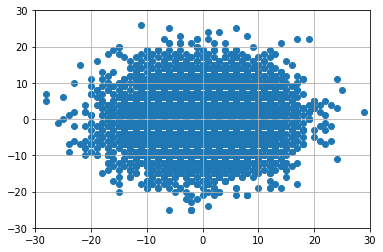

In [7]:
# Create figure and axes on which to draw
fig_size = 30 # Controls the size of the plot
fig, axes = plt.subplots(1)
axes.grid(True)
plt.xlim(-fig_size, fig_size)
plt.ylim(-fig_size, fig_size)

if len(final_positions) != num_trials:
    print("Incorrect number of final position found")
else:
    # use the first position in final_positions to determine the dimension
    dimension = len(final_positions[0])
    if dimension > 1:
        # unpack the final_positions list into a list of x-coords and y-coords
        x,y,*_ = zip(*final_positions) # *_ ignores any dimension > 2
        # plot the first two dimensions
        plt.scatter(x,y)
    else:
        # plot the 1D data, set the y-coords to 0
        plt.scatter(final_positions, [0]*len(final_positions))

        

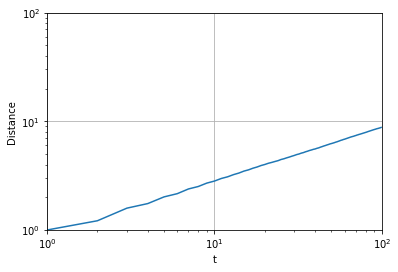

In [8]:
# Create figure and axes on which to draw
fig, axes = plt.subplots(1)
axes.set_xlabel('t')
axes.set_ylabel('Distance')
axes.grid(True)
plt.xlim(1, max_num_steps)
plt.ylim(1, max_num_steps)

# plot the average distances
plt.loglog(avg_dist_t)
plt.show()